# Regularized Linear Regression and Bias - Variance

# Regularized Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

### load data

In [2]:
# You will have X, y, Xval, yval, Xtest, ytest in your environment
data=loadmat("ex5data1.mat")

In [3]:
X = data["X"]
y = data["y"]
Xtest = data["Xtest"]
ytest = data["ytest"]
Xval = data["Xval"]
yval = data["yval"]

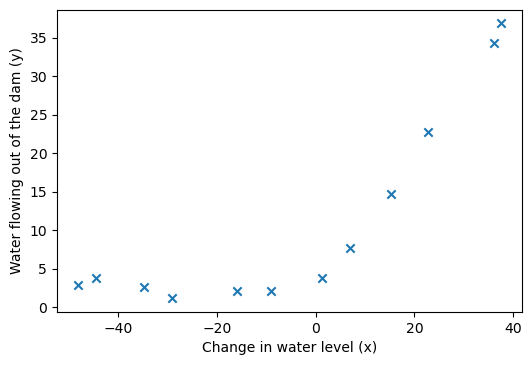

In [4]:
# Plot training data
plt.figure(dpi=100)
plt.scatter(X,y, marker ="x")
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.show()

### Regularized linear regression cost function and gradient

<img src="regularized_linear_regression_cost_function.PNG" width="400" height="200">

<img src="regularized_linear_regression_gradient.PNG" width="400" height="200">

In [18]:
m, n = X.shape[0], X.shape[1]
theta = np.ones((n+1)).reshape(-1,1)
X = np.append(np.ones((m,1)),X,axis=1)

In [19]:
def linearRegCostFunction(X, y, theta, Lambda):
    
    m = len(y)
    grad = np.zeros(len(theta)).reshape(-1,1)
    predictions = X @ theta  # predictions of hypothesis on all examples
    
    reg_J = (1/(2*m)) * (np.sum((predictions-y)**2)) + (Lambda/(2*m) * np.sum(theta[1:]**2))
    
    grad_0 = (1/m)*(X.T @ (predictions-y))[0]
    grad_1 = (1/m)*(X.T @ (predictions-y))[1:] + (Lambda/m * theta[1:]).reshape(-1,1)

    grad[0] = grad_0
    grad[1:] = grad_1
    
    return reg_J, grad

In [20]:
print('Cost at theta = [1 ; 1]: %f' %(linearRegCostFunction(X, y, theta, 1))[0])
print('Gradient at theta = [1 ; 1]: %s' %(linearRegCostFunction(X, y, theta, 1))[1])

Cost at theta = [1 ; 1]: 303.993192
Gradient at theta = [1 ; 1]: [[-15.30301567]
 [598.25074417]]


### Fitting linear regression

In [21]:
def trainLinearReg(X, y, alpha, Lambda, num_iters):
    m, n = X.shape[0], X.shape[1]
    initial_theta = np.zeros((n)).reshape(-1,1)
    J_history = np.zeros((num_iters, 1));
    for i in range(num_iters):
        J, grad = linearRegCostFunction(X, y, initial_theta, Lambda)
        initial_theta = initial_theta - alpha * grad
        J_history[i] = J
    return initial_theta, J_history  # return theta and J_history    

In [22]:
theta_gradient , J_history = trainLinearReg(X, y, 0.001, 0, 3000)

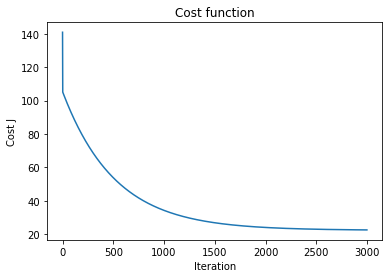

In [43]:
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("Cost J")
plt.title("Cost function")
plt.show()

### Plot fit over the data

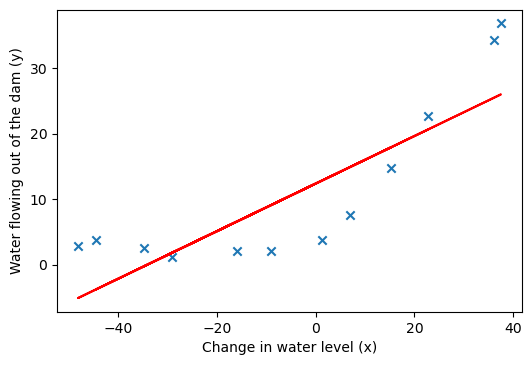

In [24]:
# Plot fit over training data
plt.figure(dpi=100)
plt.scatter(X[:,1],y, marker ="x")
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.plot(X[:,1],X @ theta_gradient, color="r")
plt.show()

## Bias Variance Tradeoff

###  Learning Curves

In [25]:
# learning curve plots training and cross validation error as a function of training set size
Xval = np.append(np.ones((Xval.shape[0],1)),Xval,axis=1)

In [26]:
def learningCurve(X, y, Xval, yval, Lambda):    
    m, n = X.shape[0], X.shape[1]
    error_train = np.zeros(m)
    error_val   = np.zeros(m)
    
    for i in range(1,m+1):
        X_sub = X[:i,]
        y_sub = y[:i,]
        
        theta = trainLinearReg(X_sub, y_sub, 0.001, Lambda, 4000)[0]
        
        error_train[i-1] = linearRegCostFunction(X_sub, y_sub, theta, 0)[0]
        error_val[i-1] = linearRegCostFunction(Xval, yval, theta, 0)[0]
     
    return error_train,error_val

In [27]:
error_train, error_val = learningCurve(X, y, Xval, yval, 0)

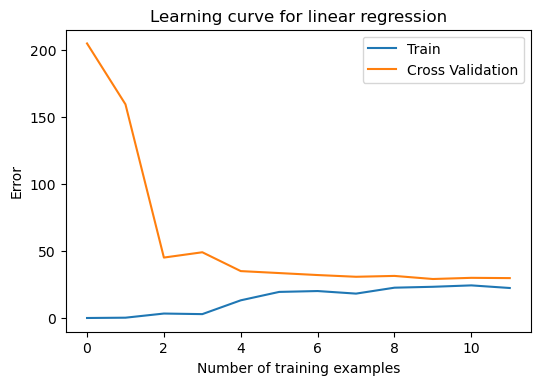

In [28]:
plt.figure(dpi=100)
plt.plot(error_train)
plt.plot(error_val)
plt.title('Learning curve for linear regression')
plt.legend(['Train', 'Cross Validation'])
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.show()

In [29]:
for i in range(m):
    print('Iteratıon :', i, 'Training error', error_train[i], 'Val error', error_val[i]);

Iteratıon : 0 Training error 9.860761315262648e-32 Val error 205.1210957454735
Iteratıon : 1 Training error 0.2277058257446693 Val error 159.64863466917515
Iteratıon : 2 Training error 3.322746197389304 Val error 45.14960917270135
Iteratıon : 3 Training error 2.8945731704363635 Val error 49.11009528799832
Iteratıon : 4 Training error 13.208040744615392 Val error 35.03628997127289
Iteratıon : 5 Training error 19.490114630555865 Val error 33.567166039527734
Iteratıon : 6 Training error 20.133449416770713 Val error 32.08847708689235
Iteratıon : 7 Training error 18.21926852810686 Val error 30.79909879298399
Iteratıon : 8 Training error 22.646188181859625 Val error 31.438082919896708
Iteratıon : 9 Training error 23.319751174446054 Val error 29.128432722683797
Iteratıon : 10 Training error 24.361595339216645 Val error 30.004349719166893
Iteratıon : 11 Training error 22.40933600851495 Val error 29.79974128483581


# POLYNOMIAL REGRESSION

In [30]:
X = data["X"]
y = data["y"]
Xtest = data["Xtest"]
ytest = data["ytest"]
Xval = data["Xval"]
yval = data["yval"]

In [31]:
def polyFeatures(X,p):
    X_poly = np.zeros((X.shape[0],p))
    for j in range(p):
        X_poly[:,j] = X[:,0]**(j+1)
    return X_poly    

# Learning Polynomial Regression

In [32]:
def featureNormalize(X):
    mu=np.mean(X,axis=0)
    sigma=np.std(X,axis=0)
    
    X_norm = (X - mu) / sigma
    
    return X_norm, mu, sigma

In [33]:
# Map X onto Polynomial Features and Normalize
m = X.shape[0]
p = 8 
X_poly = polyFeatures(X, p)
X_poly, mu, sigma = featureNormalize(X_poly)  # Normalize
X_poly = np.append(np.ones((X_poly.shape[0],1)),X_poly,axis=1)       # Add Ones

# Map X_poly_test and normalize (using mu and sigma)
X_poly_test = polyFeatures(Xtest, p)
X_poly_test, mu_test, sigma_test = featureNormalize(X_poly_test)  # Normalize
X_poly_test = np.append(np.ones((X_poly_test.shape[0],1)),X_poly_test,axis=1)       # Add Ones

# Map X_poly_val and normalize (using mu and sigma)
X_poly_val = polyFeatures(Xval, p)
X_poly_val, mu_val, sigma_val = featureNormalize(X_poly_val)  # Normalize
X_poly_val = np.append(np.ones((X_poly_val.shape[0],1)),X_poly_val,axis=1)    # Add Ones

In [34]:
Lambda = 0
theta = trainLinearReg(X_poly, y, 0.03, Lambda, 15000)[0]

In [35]:
def predict(X, mu, sigma, theta, p):
        min_array = np.linspace(X.min()-15, X.min(), 10 )
        max_array = np.linspace(X.max()+15, X.max(), 10 )
        X = np.concatenate((min_array,X, max_array), axis=None).reshape(-1,1)
        X = np.sort(X,axis=0)
        X_poly = polyFeatures(X, p)
        mu=mu
        sigma=sigma
    
        X_poly = (X_poly - mu) / sigma
        X_poly = np.append(np.ones((X_poly.shape[0],1)),X_poly,axis=1)  # Add Ones
        
        return X, (X_poly @ theta).reshape(-1,1)

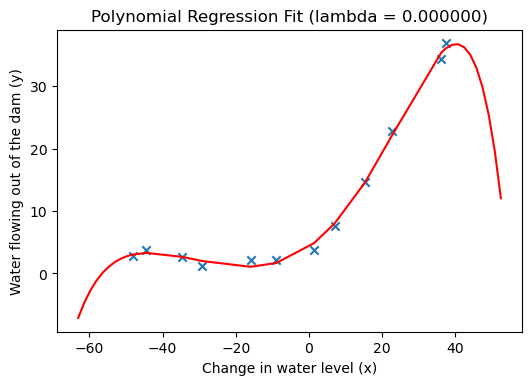

In [36]:
# Plot fit over training data
plt.figure(dpi=100)
plt.scatter(X,y, marker ="x")
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.plot(predict(X, mu, sigma, theta, 8)[0],predict(X, mu, sigma, theta, 8)[1], color="r")
plt.title('Polynomial Regression Fit (lambda = %f)'%(Lambda))
plt.show()

In [37]:
error_train, error_val = learningCurve(X_poly, y, X_poly_val, yval, Lambda)

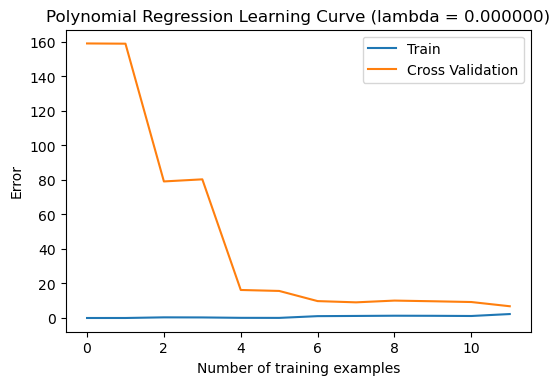

In [38]:
plt.figure(dpi=100)
plt.plot(error_train)
plt.plot(error_val)
plt.title('Polynomial Regression Learning Curve (lambda = %f)'%Lambda)
plt.legend(['Train', 'Cross Validation'])
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.show()

# Adjusting the regularization parameter

In [39]:
# set lambda to 100
Lambda = 100
theta = trainLinearReg(X_poly, y, 0.01, Lambda, 30000)[0]

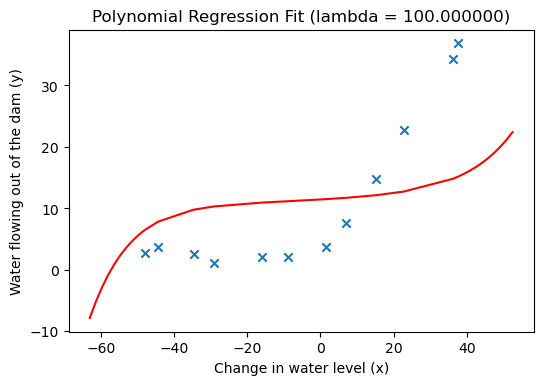

In [40]:
# Plot fit over training data
plt.figure(dpi=100)
plt.scatter(X,y, marker ="x")
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.plot(predict(X, mu, sigma, theta, 8)[0],predict(X, mu, sigma, theta, 8)[1], color="r")
plt.title('Polynomial Regression Fit (lambda = %f)'%(Lambda))
plt.show()

In [41]:
error_train, error_val = learningCurve(X_poly, y, X_poly_val, yval, Lambda)

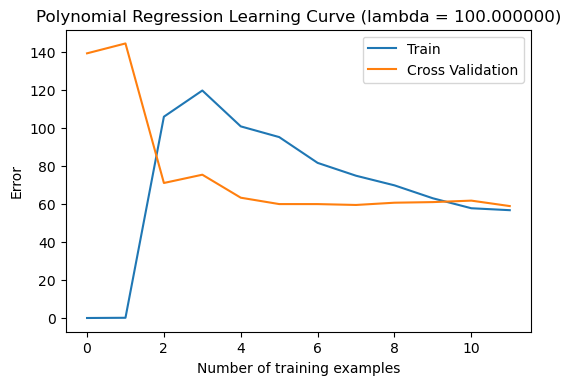

In [42]:
plt.figure(dpi=100)
plt.plot(error_train)
plt.plot(error_val)
plt.title('Polynomial Regression Learning Curve (lambda = %f)'%Lambda)
plt.legend(['Train', 'Cross Validation'])
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.show()